In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)

In [4]:
# creates the filepath
fp = os.path.join('..', 'data', 'raw', '2022_Pedal_ROI_RAW_DATA_Biokind.xlsx')

#loads DataFrame from filepath
df = pd.read_excel(fp)

In [5]:
# filters relevant columns
health_equity = df[df.columns[df.columns.str.contains("equity") | (df.columns=='Record ID')]]

# gets columns
he_cols = health_equity.columns

In [6]:
# renames some columns
he_cols_cleaned = health_equity.rename(columns={he_cols[1]: "Increase in Equity", he_cols[2]: "National", he_cols[3]: "Local", he_cols[4]: "General public", he_cols[5]: "Healthcare Professionals", he_cols[6]: "Patients", he_cols[7]: "Patient families"})

# filters out empty rows
cleaned = he_cols_cleaned[~he_cols_cleaned["Increase in Equity"].isna()]

In [7]:
# maps values to be Boolean
cleaned["Increase in Equity"] = cleaned["Increase in Equity"].map({"No": False, "Yes": True})

/var/folders/wp/5vvxp1fd6n59wfjszdqtm67r0000gn/T/ipykernel_4926/3516282874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["Increase in Equity"] = cleaned["Increase in Equity"].map({"No": False, "Yes": True})


In [37]:
# gets the number of projects for each level
level_counts = cleaned.iloc[:, 2:7].applymap(lambda x: False if x=="Unchecked" else True).sum(axis=0)
level_counts

National                    9
Local                       8
General public              7
Healthcare Professionals    5
Patients                    2
dtype: int64

[]

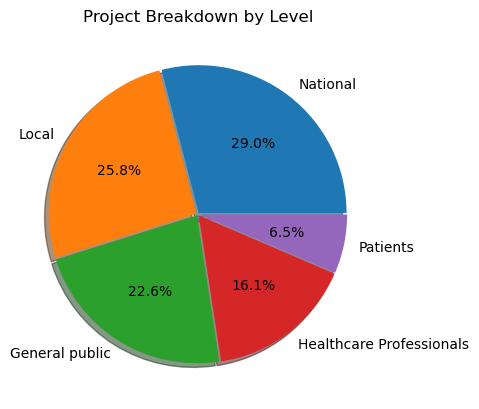

In [27]:
plt.pie(level_counts, labels=level_counts.index, normalize=True, autopct='%1.1f%%', explode=(0.01, 0.01, 0.01, 0.01, 0.01), shadow=True)
plt.title("Project Breakdown by Level")
plt.plot()

In [10]:
# Gets project titles and comments
titles = df[df["Record ID"].isin(cleaned[cleaned["Increase in Equity"]==True]["Record ID"])][["What is the project title?", "Please describe the way in which your project will lead to an increase in equity."]]
titles["Please describe the way in which your project will lead to an increase in equity."] = titles["Please describe the way in which your project will lead to an increase in equity."].shift(-1)
titles = titles[~titles["What is the project title?"].isna()]

In [38]:
level_counts = level_counts.to_frame().reset_index()
level_counts.columns = ["Level", "Count"]

In [40]:
level_counts.to_excel('../data/processed/level_counts.xlsx')

In [30]:
titles.to_excel('../data/processed/project_titles.xlsx')